In [1]:
import numpy as np
import struct
from array import array
from os.path  import join
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler


In [2]:
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)

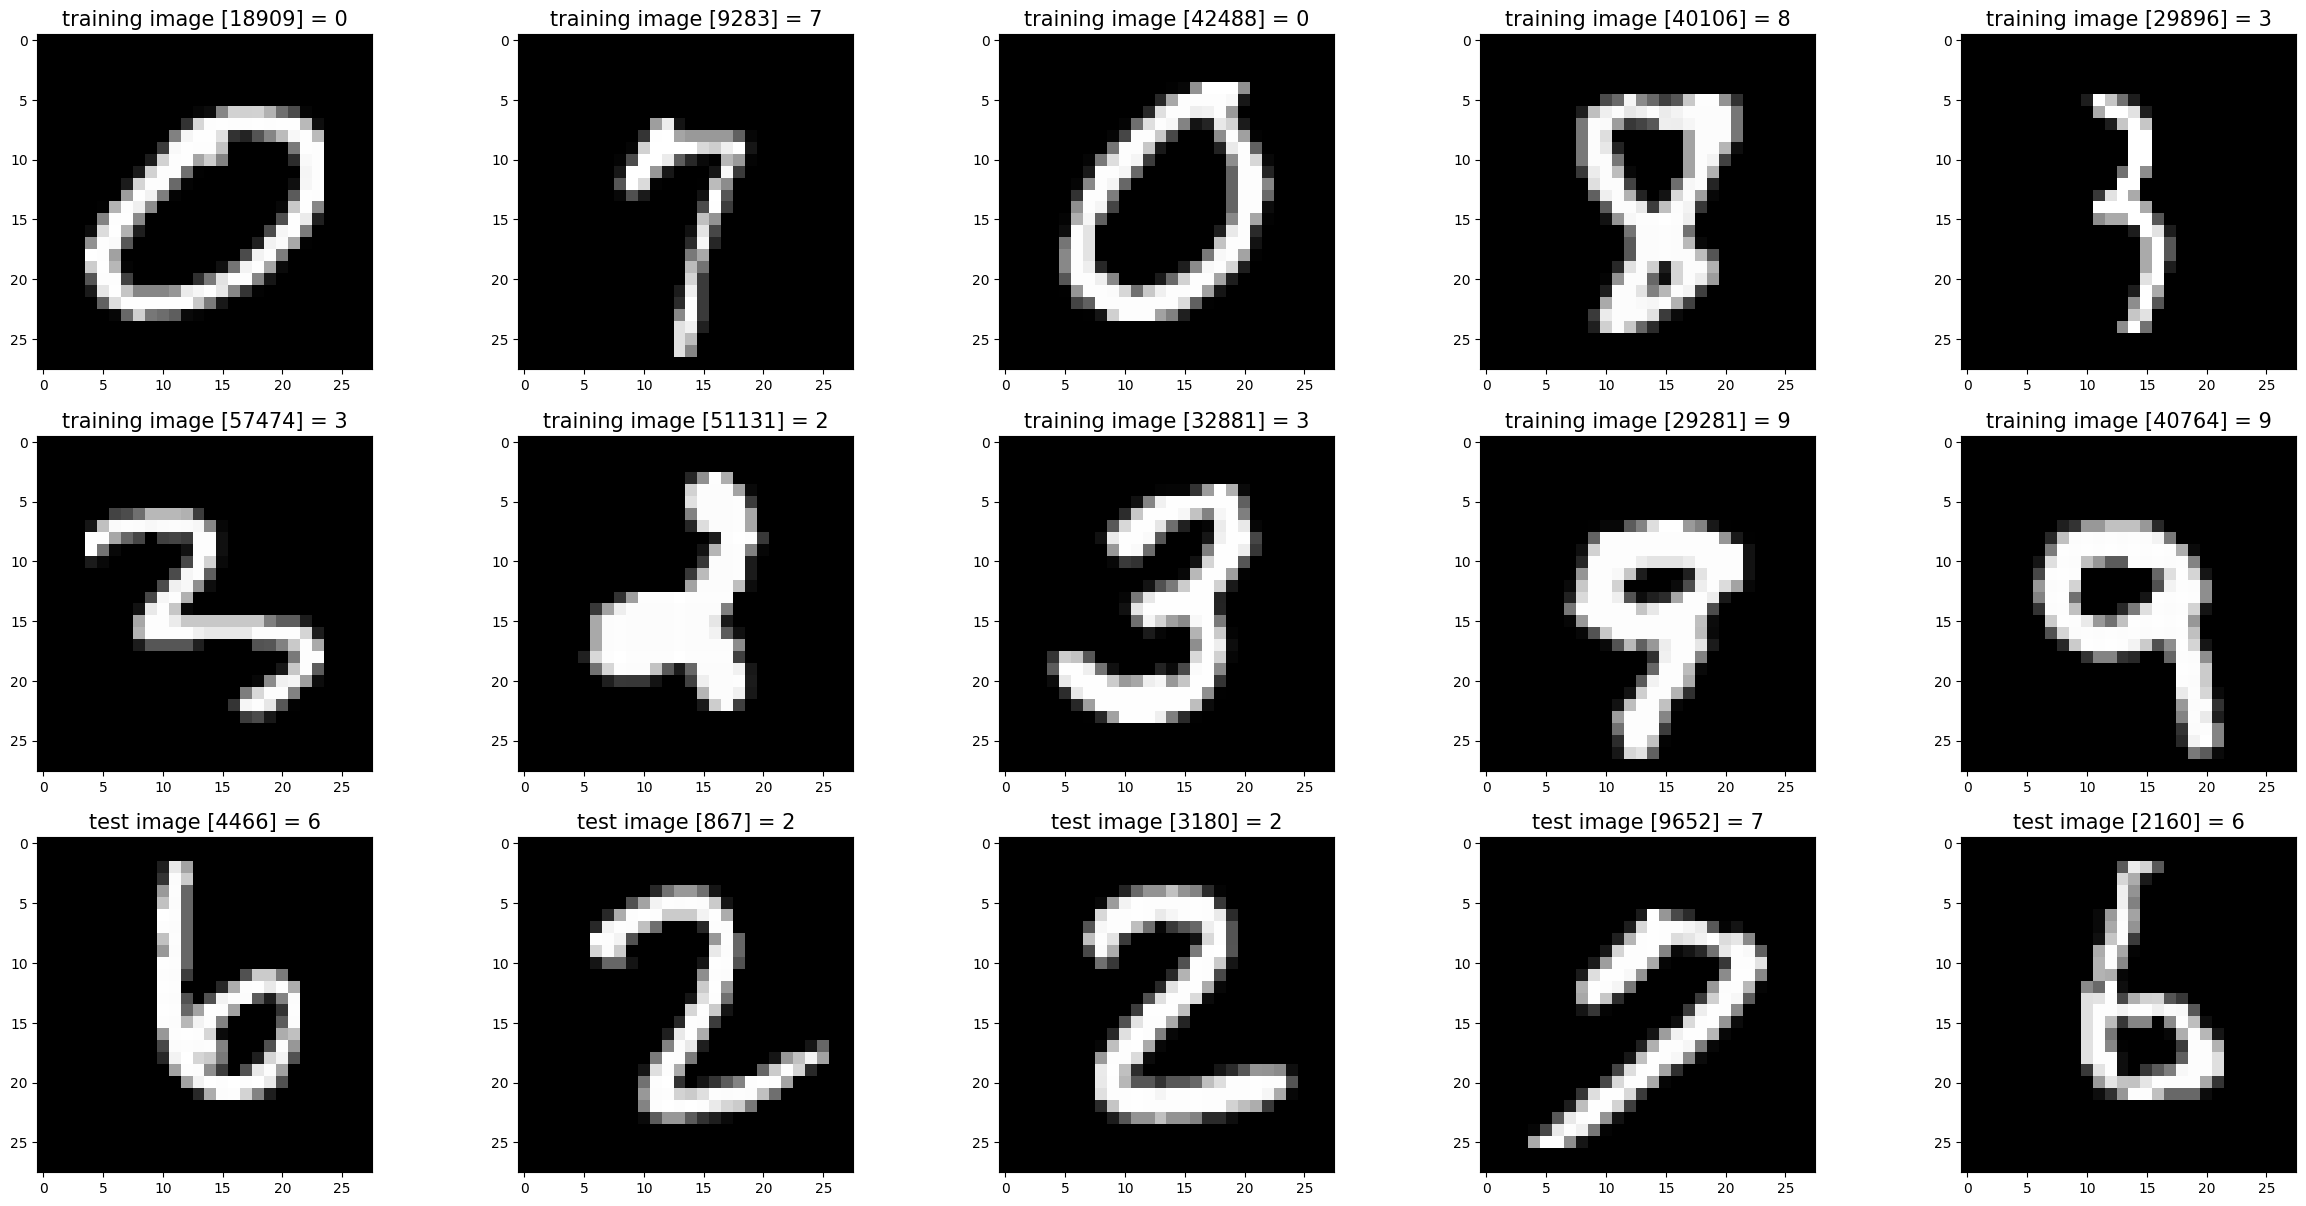

In [3]:
#
# Verify Reading Dataset via MnistDataloader class
#
%matplotlib inline
import random
import matplotlib.pyplot as plt

#
# Set file paths based on added MNIST Datasets
#
input_path = '../input/mnist-dataset'
training_images_filepath = join(input_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1
        
        
#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()
# print(x_train)

#
# Show some random training and test images 
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

show_images(images_2_show, titles_2_show)

In [4]:
from matplotlib import pyplot as plt 

# print(x_test[1], y_test[1])

# print(np.array(x_test[1]).shape)
# np.histogram(np.array(x_test[1]))

(60000, 784) (10000, 784)
[5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]
[ 980 1135 1032 1010  982  892  958 1028  974 1009]


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


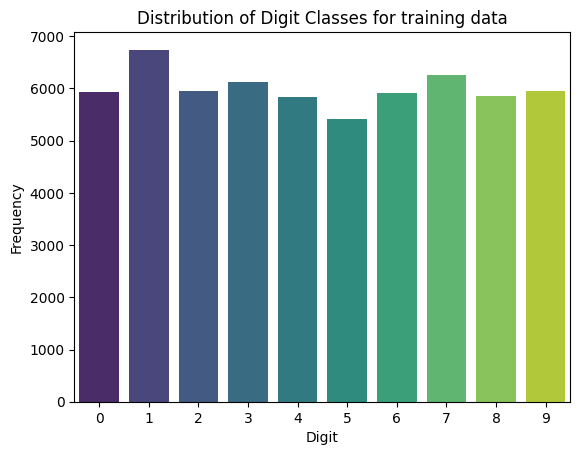

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


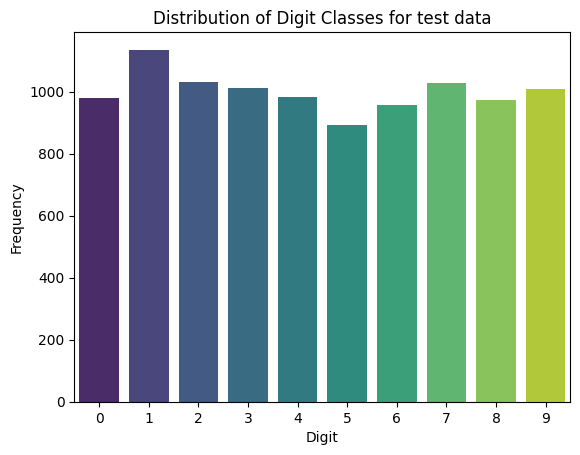

In [5]:
x_train = np.array(x_train)
x_test = np.array(x_test)

shape_train = x_train.shape
shape_test = x_test.shape

x_train = x_train.reshape(shape_train[0],-1)
x_test = x_test.reshape(shape_test[0],-1)

print(x_train.shape, x_test.shape)

x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

import seaborn as sns

# print(list(y_test))
unique, counts_train = np.unique(list(y_train), return_counts=True)
print(counts_train)
unique, counts_test = np.unique(list(y_test), return_counts=True)
print(counts_test)

sns.countplot(x=list(y_train), palette='viridis')
plt.title('Distribution of Digit Classes for training data')
plt.xlabel('Digit')
plt.ylabel('Frequency')
plt.show()

sns.countplot(x=list(y_test), palette='viridis')
plt.title('Distribution of Digit Classes for test data')
plt.xlabel('Digit')
plt.ylabel('Frequency')
plt.show()

## PCA transformation
***

In [6]:
pca1 = PCA(n_components=.95)
pca1.fit(x_train)
print(f'Total number of components used after PCA : {pca1.n_components_}')

Total number of components used after PCA : 331


In [7]:
train_img1 = pca1.transform(x_train)
test_img1 = pca1.transform(x_test)

print(f'train_img shape : {train_img1.shape}')
print(f'test_img shape : {test_img1.shape}')

train_img shape : (60000, 331)
test_img shape : (10000, 331)


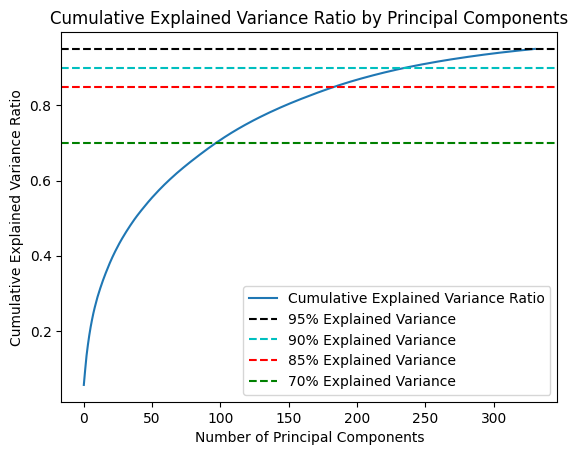

In [8]:
explained_variance_ratio = pca1.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.axhline(y = 0.95, color='k', linestyle='--', label = '95% Explained Variance')
plt.axhline(y = 0.90, color='c', linestyle='--', label = '90% Explained Variance')
plt.axhline(y = 0.85, color='r', linestyle='--', label = '85% Explained Variance')
plt.axhline(y = 0.70, color='g', linestyle='--', label = '70% Explained Variance')

plt.title('Cumulative Explained Variance Ratio by Principal Components')
plt.legend(["Cumulative Explained Variance Ratio", "95% Explained Variance", "90% Explained Variance", "85% Explained Variance", "70% Explained Variance"], loc="lower right")
plt.show()

In [9]:
svm1 = SVC()
svm1.fit(train_img1, y_train)
print(svm1.score(test_img1, y_test))

0.9679


In [10]:
pca2 = PCA(n_components=.85)
pca2.fit(x_train)
print(f'Total number of components used after PCA : {pca2.n_components_}')

train_img2 = pca2.transform(x_train)
test_img2 = pca2.transform(x_test)

print(f'train_img shape : {train_img2.shape}')
print(f'test_img shape : {test_img2.shape}')

svm2 = SVC()
svm2.fit(train_img2, y_train)
print(svm2.score(test_img2, y_test))

Total number of components used after PCA : 185
train_img shape : (60000, 185)
test_img shape : (10000, 185)
0.9696


In [11]:
pca3 = PCA(n_components=.70)
pca3.fit(x_train)
print(f'Total number of components used after PCA : {pca3.n_components_}')

train_img3 = pca3.transform(x_train)
test_img3 = pca3.transform(x_test)

print(f'train_img shape : {train_img3.shape}')
print(f'test_img shape : {test_img3.shape}')

svm3 = SVC()
svm3.fit(train_img3, y_train)
print(svm3.score(test_img3, y_test))

Total number of components used after PCA : 98
train_img shape : (60000, 98)
test_img shape : (10000, 98)
0.9703


In [12]:
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

In [13]:
pred_svm1 = svm1.predict(test_img1)
cf_matrix1 = confusion_matrix(pred_svm1, y_test)

print(f1_score(pred_svm1, y_test, average='macro'))
print(precision_score(pred_svm1, y_test, average='macro'))
print(recall_score(pred_svm1, y_test, average='macro'))
print(cf_matrix1)
# plt.figure(figsize=(15,15))
# sns.heatmap(cf_matrix1, annot=True)

0.9676936652608867
0.9675618477492206
0.9679736810126516
[[ 968    0    5    0    0    2    6    2    3    4]
 [   0 1127    1    0    0    0    2    7    0    5]
 [   1    3  996    3   11    1    0   11    4    6]
 [   1    0    2  982    0    9    0    2    5    9]
 [   0    0    2    1  946    1    4    1    6   11]
 [   3    1    0    6    2  860    9    0    9    2]
 [   3    2    1    0    3    6  928    0    3    0]
 [   2    0   15   11    8    5    6  992   11   19]
 [   2    2    9    7    2    6    3    1  931    4]
 [   0    0    1    0   10    2    0   12    2  949]]


In [14]:
pred_svm2 = svm2.predict(test_img2)
cf_matrix2 = confusion_matrix(pred_svm2, y_test)

print(f1_score(pred_svm2, y_test, average='macro'))
print(precision_score(pred_svm2, y_test, average='macro'))
print(recall_score(pred_svm2, y_test, average='macro'))
print(cf_matrix2)
# plt.figure(figsize=(15,15))
# sns.heatmap(cf_matrix2, annot=True)

0.9694174936653821
0.9693013283387583
0.9696185211075754
[[ 968    0    6    0    0    2    5    1    2    3]
 [   0 1128    1    0    0    0    2   10    0    6]
 [   1    3  997    2    7    1    0   10    5    5]
 [   1    0    2  983    0    9    0    2    4    8]
 [   0    0    1    2  951    2    4    1    5   11]
 [   3    1    0    5    1  862    7    0    9    4]
 [   3    1    1    1    4    5  932    0    2    0]
 [   2    0   15   10    7    3    4  990   11   15]
 [   2    2    8    7    2    6    4    1  932    4]
 [   0    0    1    0   10    2    0   13    4  953]]


In [15]:
pred_svm3 = svm3.predict(test_img3)
cf_matrix3 = confusion_matrix(pred_svm3, y_test)

print(f1_score(pred_svm3, y_test, average='macro'))
print(precision_score(pred_svm3, y_test, average='macro'))
print(recall_score(pred_svm3, y_test, average='macro'))
print(cf_matrix3)
# plt.figure(figsize=(15,15))
# sns.heatmap(fmatrix3, annot=True)

0.9700474971556045
0.9699812796147093
0.9701621177714278
[[ 969    0    6    0    0    2    4    3    5    3]
 [   0 1128    0    0    0    0    2    9    0    6]
 [   1    3 1005    1    7    0    1   11    3    3]
 [   1    0    1  982    0   12    0    3    7    9]
 [   0    0    1    1  951    2    4    3    6   12]
 [   3    1    0    6    0  860    9    0    8    3]
 [   3    1    1    0    4    6  934    0    1    0]
 [   1    0   12   10    7    2    0  985    7   13]
 [   2    2    5    9    3    7    4    0  934    5]
 [   0    0    1    1   10    1    0   14    3  955]]
